In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Image')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_edf import load_objects
from __01_transform_data import transform_eeg_data
from __02_model import train, visualize
from __01_transform_data import process_band

In [4]:
X, Y = load_objects(fo)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {X.shape}')

Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Image\aashay_Apple.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Image\aashay_Car.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Image\aashay_Dog.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Image\aashay_Gold.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Image\aashay_Mobile.edf...
EDF file detected
Setting channel info structur

Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1149 - loss: 2.5794
Epoch 1: val_loss improved from inf to 2.32519, saving model to model/two_channel/model_object_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.1149 - loss: 2.5777 - val_accuracy: 0.1083 - val_loss: 2.3252
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1387 - loss: 2.2981
Epoch 2: val_loss did not improve from 2.32519
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.1387 - loss: 2.2979 - val_accuracy: 0.1038 - val_loss: 2.4756
Epoch 3/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1532 - loss: 2.2530
Epoch 3: val_loss did not improve from 2.32519
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.1532 - loss: 2.2530 - val_accuracy: 0.1082 - val_loss: 2.4677
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1693 - loss: 2.2091
Epoch 4: val_loss did not improve from 2.32519
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/st

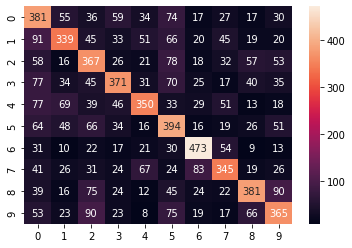

226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


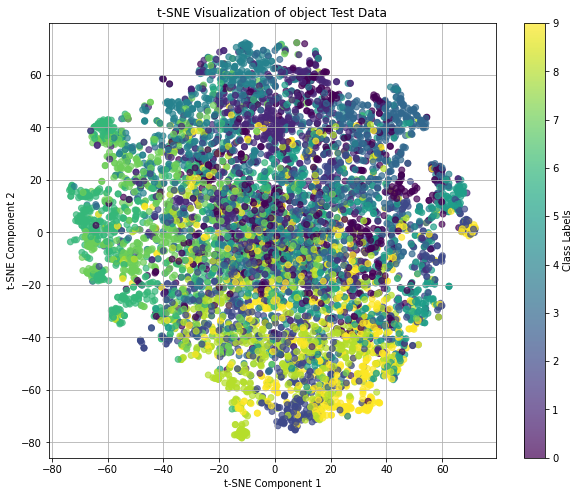

In [5]:
selected_channels = [4,9]
dataset_type = 'object'
channels = 'two_channel'
X_new, Y_new = transform_eeg_data(X, Y, selected_channels)

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [6]:
THETA = (4, 7)
ALPHA = (7, 15)
BETA = (15, 31)
GAMMA = (31, None)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1083 - loss: 2.5309
Epoch 1: val_loss improved from inf to 2.33295, saving model to model/two_channel/model_object_THETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.1083 - loss: 2.5296 - val_accuracy: 0.1057 - val_loss: 2.3329
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1149 - loss: 2.3164
Epoch 2: val_loss improved from 2.33295 to 2.32940, saving model to model/two_channel/model_object_THETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.1149 - loss: 2.3164 - val_accuracy: 0.0978 - val_loss: 2.3294
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1230 - loss: 2.2891
Epoch 3: val_loss did not improve from 2.32940
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.1230 - loss: 2.2891 - val_accuracy: 0.1101 - val_loss: 2.3565
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1253 - loss: 2.2749
Epoch 4: val_loss improved fro

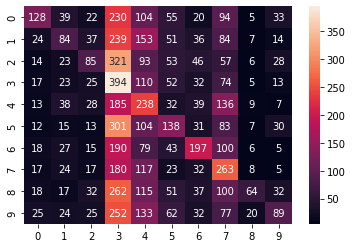

226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


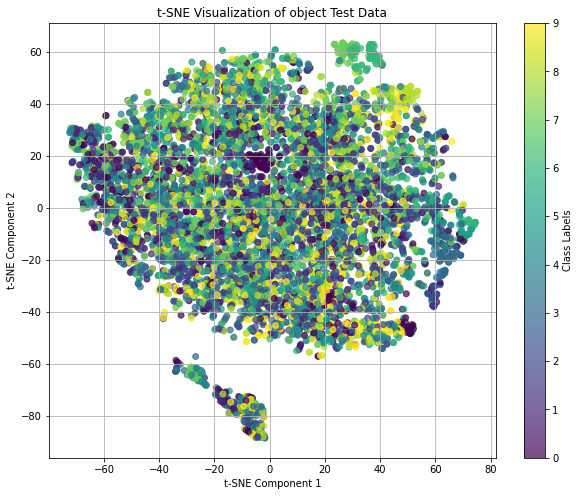

In [7]:
X_new, Y_new = process_band(X, Y, l_freq=THETA[0], h_freq=THETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='THETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1089 - loss: 2.5417
Epoch 1: val_loss improved from inf to 2.31240, saving model to model/two_channel/model_object_ALPHA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.1089 - loss: 2.5403 - val_accuracy: 0.0931 - val_loss: 2.3124
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1108 - loss: 2.3181
Epoch 2: val_loss did not improve from 2.31240
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.1108 - loss: 2.3180 - val_accuracy: 0.1042 - val_loss: 2.3187
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1310 - loss: 2.2907
Epoch 3: val_loss did not improve from 2.31240
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.1310 - loss: 2.2907 - val_accuracy: 0.1054 - val_loss: 2.3753
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1427 - loss: 2.2640
Epoch 4: val_loss did not improve from 2.31240
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - ac

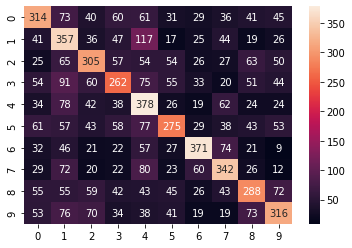

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


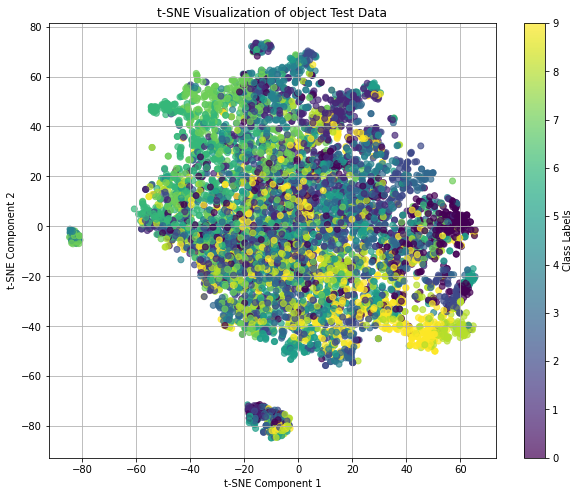

In [8]:
import importlib

X_new, Y_new = process_band(X, Y, l_freq=ALPHA[0], h_freq=ALPHA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='ALPHA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1091 - loss: 2.5494
Epoch 1: val_loss improved from inf to 2.34718, saving model to model/two_channel/model_object_BETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.1091 - loss: 2.5480 - val_accuracy: 0.1016 - val_loss: 2.3472
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1259 - loss: 2.3151
Epoch 2: val_loss did not improve from 2.34718
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.1259 - loss: 2.3149 - val_accuracy: 0.0917 - val_loss: 2.3616
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1514 - loss: 2.2577
Epoch 3: val_loss improved from 2.34718 to 2.27712, saving model to model/two_channel/model_object_BETA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.1515 - loss: 2.2576 - val_accuracy: 0.1360 - val_loss: 2.2771
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1844 - loss: 2.1799
Epoch 4: val_loss did not improv

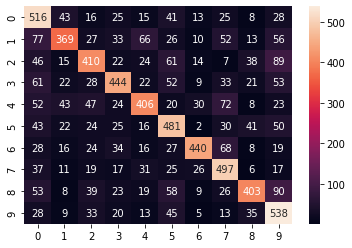

226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


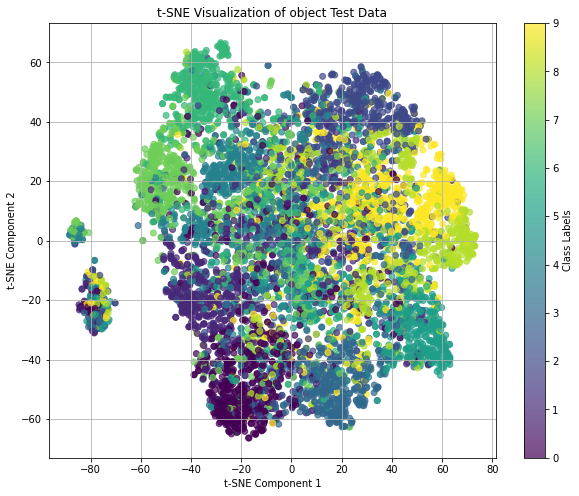

In [9]:
X_new, Y_new = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='BETA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1144 - loss: 2.5668
Epoch 1: val_loss improved from inf to 2.31892, saving model to model/two_channel/model_object_GAMMA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.1145 - loss: 2.5659 - val_accuracy: 0.0943 - val_loss: 2.3189
Epoch 2/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1644 - loss: 2.2333
Epoch 2: val_loss did not improve from 2.31892
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.1645 - loss: 2.2329 - val_accuracy: 0.1092 - val_loss: 2.3411
Epoch 3/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2181 - loss: 2.0570
Epoch 3: val_loss did not improve from 2.31892
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.2182 - loss: 2.0567 - val_accuracy: 0.1082 - val_loss: 2.7416
Epoch 4/50
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2573 - loss: 1.9273
Epoch 4: val_loss did not improve from 2.31892
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - ac

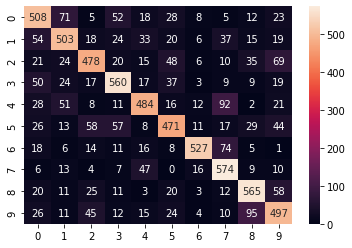

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


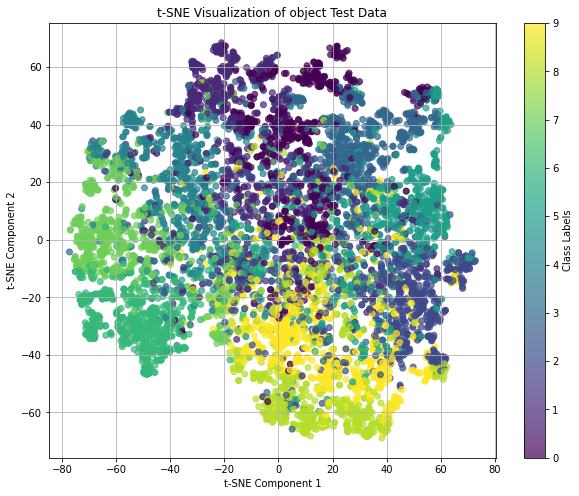

In [10]:
X_new, Y_new = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='GAMMA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)